<a href="https://colab.research.google.com/github/f-amerehi/bug-free-pytorch-and-Tensorflow/blob/main/Caption.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install salesforce-lavis


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 7.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.6/13.6 MB 29.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.6/44.6 kB 5.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 235.4/235.4 kB 10.5 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.4/53.4 kB 6.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.2/42.2 kB 3.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.5/79.5 kB 9.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.8/47.8 MB 10.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 204.2/204.2 kB 16.9 MB/s eta 0:00:00
     ━━━━━━━━━

In [2]:
import torch
from lavis.models import load_model_and_preprocess
from PIL import Image
import requests
from io import BytesIO
import matplotlib.pyplot as plt
from torchvision.transforms import v2

In [3]:

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
device

device(type='cuda')

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/28.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

100%|██████████| 2.50G/2.50G [00:20<00:00, 131MB/s]


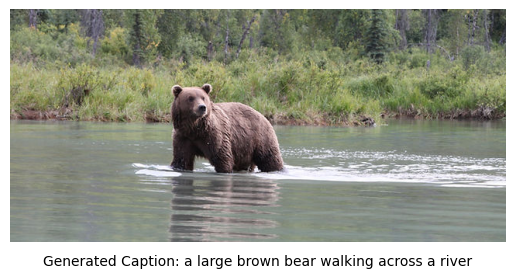

In [4]:

# Load BLIP
model, vis_processors, _ = load_model_and_preprocess(name="blip_caption", model_type="base_coco", is_eval=True, device=device)


image_url = "https://static.wixstatic.com/media/80284b_56b4355a3c494ee1b4a68f76151a6022~mv2_d_4752_3168_s_4_2.jpg/v1/fill/w_640,h_300,al_c,q_80,usm_0.66_1.00_0.01,enc_auto/80284b_56b4355a3c494ee1b4a68f76151a6022~mv2_d_4752_3168_s_4_2.jpg"
response = requests.get(image_url)
raw_image = Image.open(BytesIO(response.content))

# Preprocess the image
image = vis_processors["eval"](raw_image).unsqueeze(0).to(device)

# Generate a caption
generated_caption = model.generate({"image": image})

fig, ax = plt.subplots()
ax.imshow(raw_image)
ax.axis("off")
caption_text = "Generated Caption: {}".format(generated_caption[0])
plt.text(0.5, -0.1, caption_text, ha="center", transform=ax.transAxes, fontsize=10)
plt.show()


In [5]:
def plot_images(images, titles=None, title_fontsize=8):
    num_images = len(images)
    fig, axs = plt.subplots(1, num_images, figsize=(15, 5))

    for i in range(num_images):
        if titles is not None:
            axs[i].set_title(titles[i], fontsize=title_fontsize)
        axs[i].imshow(images[i])
        axs[i].axis('off')

    plt.show()

#### Augmnet using augmix

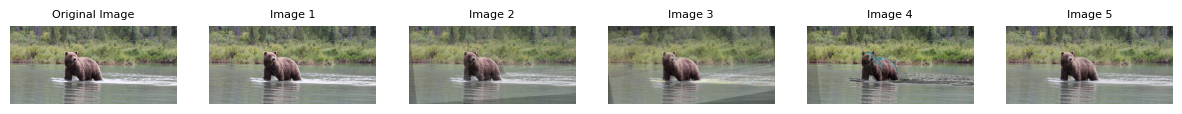

In [9]:

augmenter = v2.AugMix(severity = 4)
imgs = [augmenter(raw_image) for _ in range(5)]

plot_images([raw_image] + imgs, titles=["Original Image"] + [f"Image {i+1}" for i in range(len(imgs))])



##### looking into captions for augmixed images

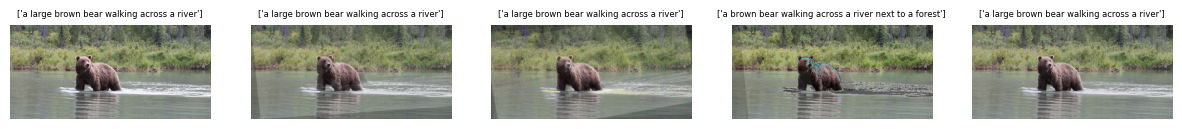

In [10]:
captions = []
for img in imgs:
    image = vis_processors["eval"](img).unsqueeze(0).to(device)
    generated_caption = model.generate({"image": image})
    captions.append(generated_caption)

plot_images(imgs, titles=captions, title_fontsize=6)